In [1]:
# Imports
import pandas as pd
import geopandas as gpd
import folium
from folium import plugins
import matplotlib.pyplot as plt


In [2]:
# upload collision data
crash_df = pd.read_csv('../Resources/Montgomery_Crash_Data.csv', index_col='Crash Date/Time', parse_dates=True)
crash_df.head()

,Report Number,Weather,Surface Condition,Injury Severity,Vehicle ID,Vehicle Year,Vehicle Make,Vehicle Model,Latitude,Longitude,ACRS Report Type,geometry
Crash Date/Time,,,,,,,,,,,,
2021-04-04 12:00:00,MCP26370040,CLEAR,DRY,NO APPARENT INJURY,88FCD6CE-A85A-4CBD-9BEC-3B6E6DCF16BB,2021,MITS,DELOCA,39.057201,-77.293102,Property Damage Crash,POINT (-77.29310223 39.05720146)
2023-12-04 21:37:00,MCP3221002N,CLEAR,DRY,SUSPECTED MINOR INJURY,6E02796A-26BA-45CD-88B1-13EEDF7EC29C,2015,TOYOTA,RAV4,39.058683,-77.290703,Injury Crash,POINT (-77.29070333 39.05868333)
2024-07-17 21:27:00,MCP9399002C,CLOUDY,WET,SUSPECTED MINOR INJURY,70D8BF87-2BB7-4092-9267-0AD9E7E42978,2004,JEEP,GRAND CHEROKEE,39.063110,-77.295795,Injury Crash,POINT (-77.29579535000001 39.06310977)
2016-06-21 09:49:00,MCP28240026,RAIN,WET,NO APPARENT INJURY,334BEA8D-C367-4DFB-8A70-93750F1BCFBC,2008,HOND,4S,39.063192,-77.296605,Property Damage Crash,POINT (-77.296605 39.06319167)
2016-12-05 06:55:00,MCP2497000L,RAIN,WET,SUSPECTED MINOR INJURY,B8B60239-5172-4024-846A-0EAFD3A7E0B2,2004,VOLVO,S60,39.063220,-77.295740,Injury Crash,POINT (-77.29574 39.06322)


In [3]:
# Create dataframe into a geodataframe
montgomery_gdf = gpd.GeoDataFrame(crash_df, geometry=gpd.points_from_xy(crash_df.Longitude, crash_df.Latitude), crs='EPSG:4326').sort_index()
montgomery_gdf.head(3)


,Report Number,Weather,Surface Condition,Injury Severity,Vehicle ID,Vehicle Year,Vehicle Make,Vehicle Model,Latitude,Longitude,ACRS Report Type,geometry
Crash Date/Time,,,,,,,,,,,,
2015-01-01 00:30:00,MCP11520005,CLEAR,DRY,NO APPARENT INJURY,EED35F71-B94E-4225-98D4-3405AEA57D0B,1993,BUICK,4S,39.022001,-77.102673,Property Damage Crash,POINT (-77.10267 39.02200)
2015-01-01 01:10:00,MCP2686000D,OTHER,DRY,NO APPARENT INJURY,3F9C76B4-F704-4FA7-87AB-B3BAEBBC5146,2007,JEEP,COMPASS,39.196610,-77.265547,Property Damage Crash,POINT (-77.26555 39.19661)
2015-01-01 01:14:00,MCP2783000G,CLEAR,DRY,NO APPARENT INJURY,89F9B6F8-1F89-4EBD-84A3-D0DAE2D7A90C,1999,FORD,PICK UP,39.096217,-77.109803,Injury Crash,POINT (-77.10980 39.09622)


In [4]:
# Get column information
montgomery_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
DatetimeIndex: 101138 entries, 2015-01-01 00:30:00 to 2024-10-02 19:15:00
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype   
---  ------             --------------   -----   
 0   Report Number      101138 non-null  object  
 1   Weather            101138 non-null  object  
 2   Surface Condition  89062 non-null   object  
 3   Injury Severity    101138 non-null  object  
 4   Vehicle ID         101138 non-null  object  
 5   Vehicle Year       101138 non-null  int64   
 6   Vehicle Make       101132 non-null  object  
 7   Vehicle Model      101113 non-null  object  
 8   Latitude           101138 non-null  float64 
 9   Longitude          101138 non-null  float64 
 10  ACRS Report Type   101138 non-null  object  
 11  geometry           101138 non-null  geometry
dtypes: float64(2), geometry(1), int64(1), object(8)
memory usage: 10.0+ MB


In [5]:
# upload county Geojson and make it into geodataframe
county_gdf = gpd.read_file('../Resources/Montgomery_County.json')
county_gdf.head()

,FID,County,State,Country,FIPS,Combined,12_31_22,Pct_Total,geometry
0,0,Montgomery,Maryland,US,24031,"Montgomery, Maryland, US",131345,21.9854,"POLYGON ((-77.00249 38.96595, -77.00241 38.966..."


In [10]:
# create background map
m = folium.Map(location=[39.1364, -77.1715], tiles="Cartodb dark_matter", zoom_start=11) 

#create geojson with all county boundaries
#add fill color for polygons
for _, r in county_gdf.iterrows():
    sim_geo = gpd.GeoSeries(r["geometry"]).simplify(tolerance=0.001)
    geo_j = sim_geo.to_json()
    geo_j = folium.GeoJson(data=geo_j, style_function=lambda x: {"fillColor": "none"})
    folium.Popup(r["County"]).add_to(geo_j)
    geo_j.add_to(m)


### Paramters to add to the map ####
# Comment/Uncomment this section to view GeoPandas frame in different perspectives

# column = None
# value = None
# start_year = '2024'

# column = 'Surface Condition'
# value = 'ICE'
# start_year = '2015'

# column = 'Weather'
# value = 'RAIN'
# start_year = '2015'

column = 'Injury Severity' # column of interest
value = 'FATAL INJURY' # choose the value you want overlay on map
start_year = '2015' #chose start year you want to investigate

if column:
    #filter gdf by year interval and create conditional statement
    filtered_data = montgomery_gdf.loc[start_year:'2024']
    conditional = filtered_data[column] == value
    #create list of point geometries and a heatmap from them
    heat_data = [[point.xy[1][0], point.xy[0][0]] for point in filtered_data.loc[conditional].geometry]
    plugins.HeatMap(heat_data, min_opacity=.2, radius=20,zoom_start=2).add_to(m)

    #create a list dates in string format and attribute them to the points 
    #created on the map
    date_data = [str(date) for date in filtered_data.loc[conditional].index]
    for point, date in zip(heat_data, date_data):
        folium.CircleMarker(point, radius=.2, fill_color="black", color="blue", popup=folium.Popup(date)).add_to(m)
else:
    #filter gdf by year interval
    filtered_data = montgomery_gdf.loc[start_year:'2024']
    #create list of point geometries and a heatmap from them
    heat_data = [[point.xy[1][0], point.xy[0][0]] for point in filtered_data.geometry]
    plugins.HeatMap(heat_data, min_opacity=.2, radius=20,zoom_start=2).add_to(m)

    #create a list dates in string format and attribute them to the points 
    #created on the map
    date_data = [str(date) for date in filtered_data.index]
    for point, date in zip(heat_data, date_data):
        folium.CircleMarker(point, radius=.2, fill_color="black", color="blue", popup=folium.Popup(date)).add_to(m)

#add widget that allows user to turn on and off map layers    
folium.LayerControl().add_to(m)

m

In depth interactive analysis of geolocation based visualizaton for different parameters reveal following key findngs:
- Snow
    - There are pockets of crashes on following roads, which suggest some infrastructure development might help reducing accidents
        - Muncaster Mill Road
        - Avery Road
        - Germantown Road
        - Randolph Road
        - University Boulevard
        - Old Columbia Pike
        - Spencerville Road
- Fatal Crashes
    - There are some hotspots for fatal crashes, which needs further investigation from county that can reveal possible improvements
        - A road patch on Columbia Pike
        - A road patch on Georgia Avenue
        - A road patch on Veirs Mill Road
        - A road patch on Georgia Avenue

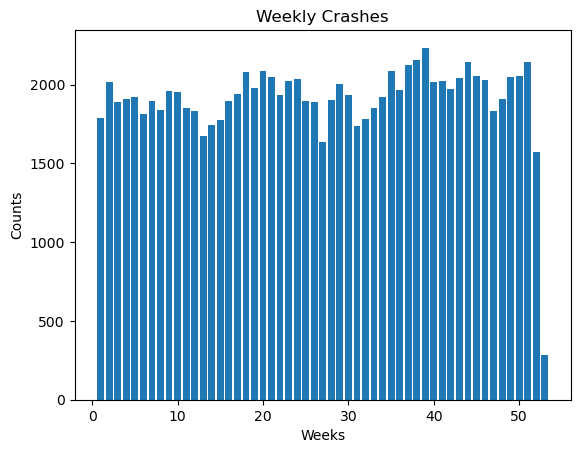

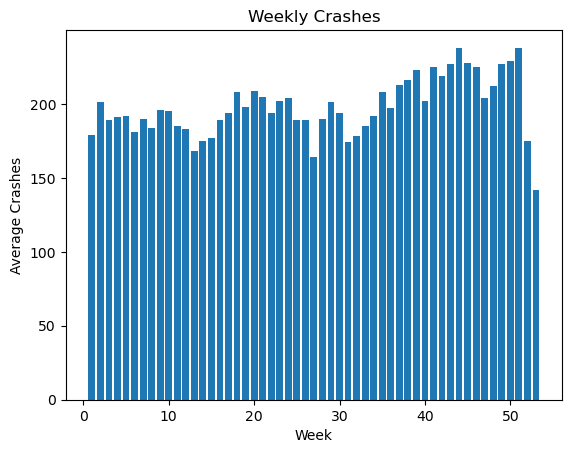

In [7]:
# make a list for the weeks of the year
weeks = crash_df.index.isocalendar().week.sort_values().unique()

# plot the counts for each week
plt.bar(weeks, crash_df.index.isocalendar().week.value_counts().sort_index())
plt.title('Weekly Crashes')
plt.xlabel('Weeks')
plt.ylabel('Counts')
plt.show()

#plot average chrashes for each week
weekly_crash_count = crash_df.groupby([crash_df.index.isocalendar().year, crash_df.index.isocalendar().week])['Report Number'].count().reset_index()
plt.bar(weeks, weekly_crash_count.groupby('week')['Report Number'].mean().round())
plt.title('Weekly Crashes')
plt.xlabel('Week')
plt.ylabel('Average Crashes')
plt.show()

- On an average, week 44 and week 50 seems to have most crashes happening. 
- Overall, number of crashes increases towars end of the year before coming down around Christmas time.

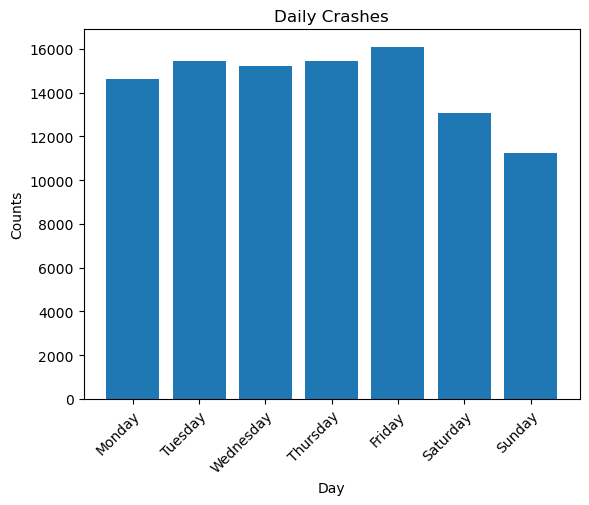

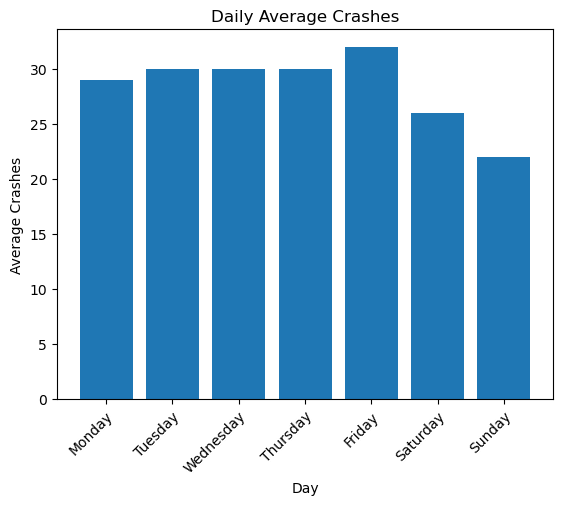

In [8]:
# make a list for the days of the week
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']  # crash_df.index.isocalendar().day.sort_values().unique()

# plot the counts for each day
plt.bar(days, crash_df.index.isocalendar().day.value_counts().sort_index())
plt.title('Daily Crashes')
plt.xlabel('Day')
plt.ylabel('Counts')
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
plt.show()

#plot average crashes for each day
daily_crash_count = crash_df.groupby([crash_df.index.isocalendar().year, crash_df.index.isocalendar().week, 
                                      crash_df.index.isocalendar().day])['Report Number'].count().reset_index()
plt.bar(days, daily_crash_count.groupby('day')['Report Number'].mean().round())
plt.title('Daily Average Crashes')
plt.xlabel('Day')
plt.ylabel('Average Crashes')
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
plt.show()

- Even though crashes are comparatively high during weekdays, **Fridays** have more crashes then any other day of week.
- Weekends show less number of crashes as compare to the rest of the week.

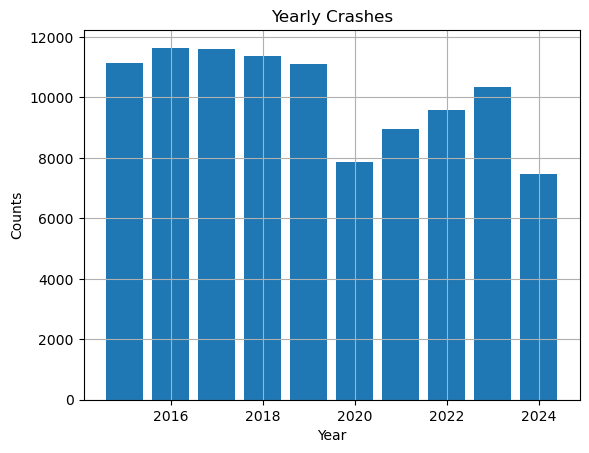

In [9]:
# make a list for the weeks of the year
years = crash_df.index.isocalendar().year.sort_values().unique()

# plot the counts for each week
plt.bar(years, montgomery_gdf.index.isocalendar().year.value_counts().sort_index())
plt.grid(linestyle = '-' )
plt.title('Yearly Crashes')
plt.xlabel('Year')
plt.ylabel('Counts')
plt.show()

- Yearly distribution of crashes are in sync with other yearly analysis and shows that stay-at-home restrictions during pandemic have reduced number of accidents becuase there were significantly less number of drivers on the road.